# *Explanatory Data Analysis*

## ***Risk Factors of Heart Disease***

https://www.hopkinsmedicine.org/health/conditions-and-diseases/coronary-heart-disease

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import plotnine as p9
plt.rcParams['axes.facecolor'] = 'white'
sns.set(rc = {'figure.figsize':(14,10)})
sns.set_style("white")
plt.rcParams["figure.figsize"] = (14,10)

In [ ]:
def percentage_plot(var1, var2, arr, white):
  plt.figure(figsize=(14,10))
  cross_tab_prop = pd.crosstab(index=df[var1],
                              columns=df[var2],
                              normalize="index")
  ax = cross_tab_prop.plot(kind='bar', 
                      stacked=True, 
                      figsize=(14, 10),
                      orientation=u'vertical',
                      color = ['#B40426', '#A1A4A9'],
                      )
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.axes.get_yaxis().set_visible(False)
  plt.legend(loc="upper left", ncol=2)
  plt.xlabel(var1)
  plt.ylabel("Percentage")
  plt.xticks(rotation=360)
  ax.legend(loc='upper left', ncol = 2, bbox_to_anchor=(-0.011, 1.03), prop={'size': 13})
  ax.set_title(f'{var1} and {var2}\n', size = 24, loc = 'left', fontname="Arial")
  ax.tick_params(axis='x', labelsize=18)
  ax.set(xlabel=None)
  
  cross_tab = pd.crosstab(index=df[var1],
                          columns=df[var2])
  
  for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
        if(np.round(proportion * 100, 1) in arr):        
          plt.text(x=n - 0.17,
                  y=(y_loc - proportion) + (proportion / 2),
                  s=f'{white}{np.round(proportion * 100, 1)}%', 
                  color="black",
                  fontsize=16,
                  fontweight="bold")
        
  plt.show()

In [ ]:
df = pd.read_csv("/content/Heart Diseases Clean Grouped Last.csv")

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholestrol',
       'Fasting Blood Pressure > 120mg/dl', 'Rest ECG', 'Maximum Heart Rate',
       'Exercise Induced Angina', 'Exercise Induced ST Depression', 'Slope',
       'Number of Major Vessels', 'Thalassemia', 'Outcome'],
      dtype='object')

### Heart Disease, Gender, Thalassemia


<Figure size 1008x720 with 0 Axes>

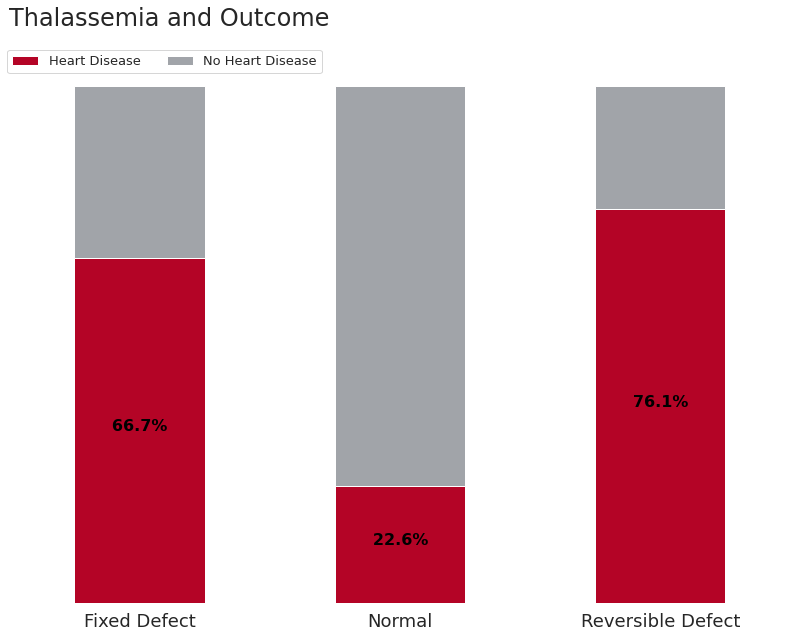

In [ ]:
percentage_plot("Thalassemia", "Outcome", [66.7, 22.6, 76.1], '   ')

### Sex and Outcome

<Figure size 1008x720 with 0 Axes>

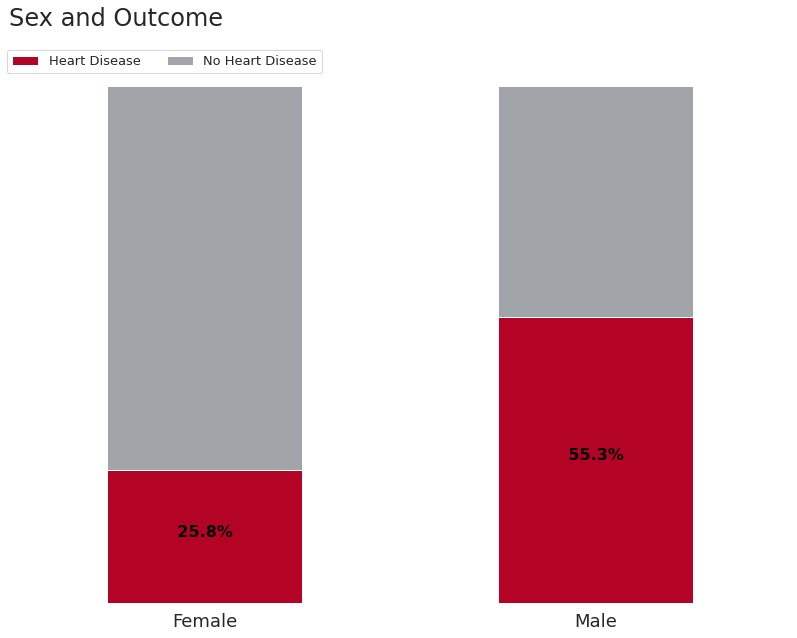

In [ ]:
percentage_plot('Sex', 'Outcome', [25.8, 55.3], '       ')

### Chest Pain Type and Outcome

<Figure size 1008x720 with 0 Axes>

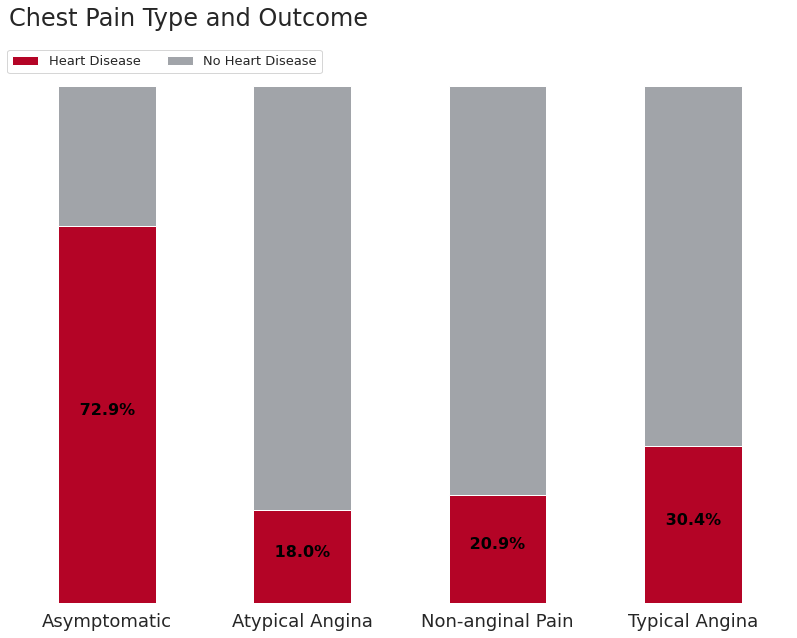

In [ ]:
percentage_plot('Chest Pain Type', 'Outcome', [72.9, 18.0, 20.9, 30.4], ' ')

### Slope and Outcome

<Figure size 1008x720 with 0 Axes>

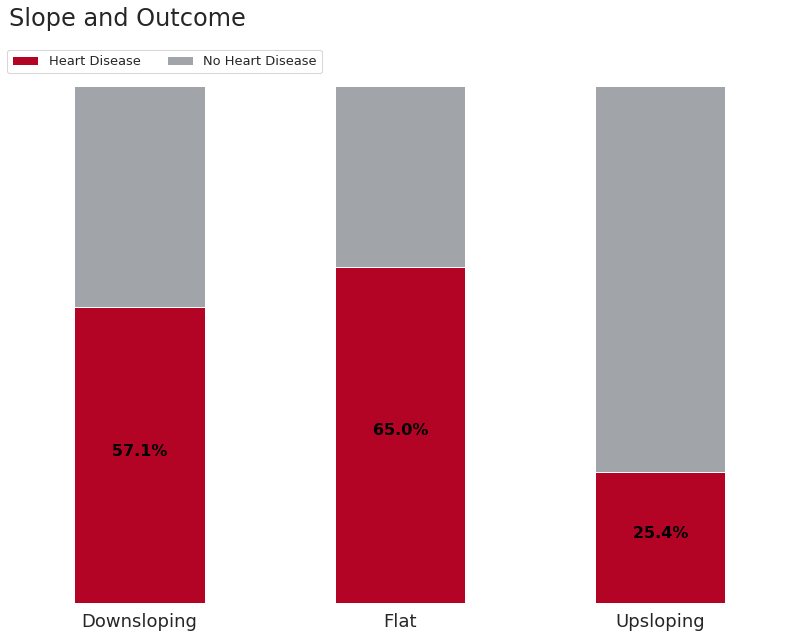

In [ ]:
percentage_plot('Slope', 'Outcome', [57.1, 65.0, 25.4], '   ')

### Number of Major Vessels and Outcome

<Figure size 1008x720 with 0 Axes>

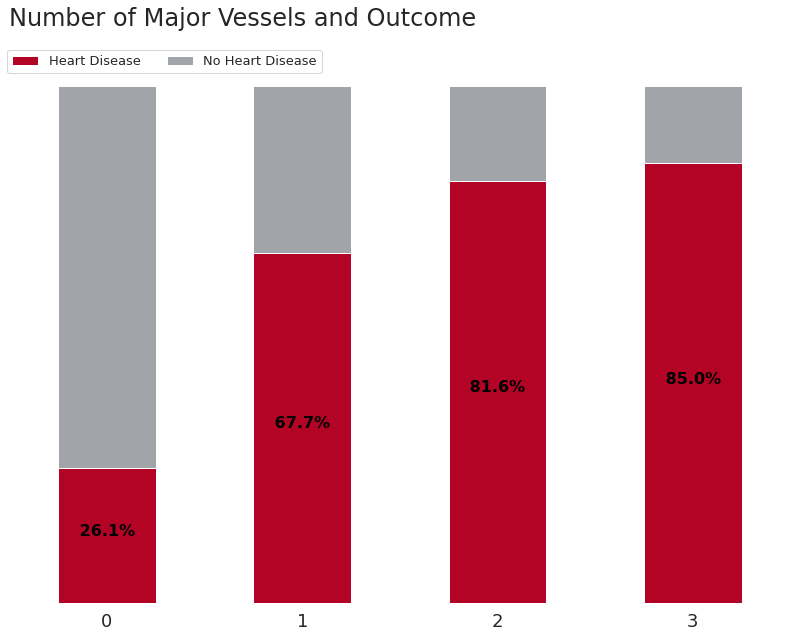

In [ ]:
percentage_plot('Number of Major Vessels', 'Outcome', [26.1, 67.7,81.6,85.0], ' ')

### Exercise Induced Angina and Outcome

<Figure size 1008x720 with 0 Axes>

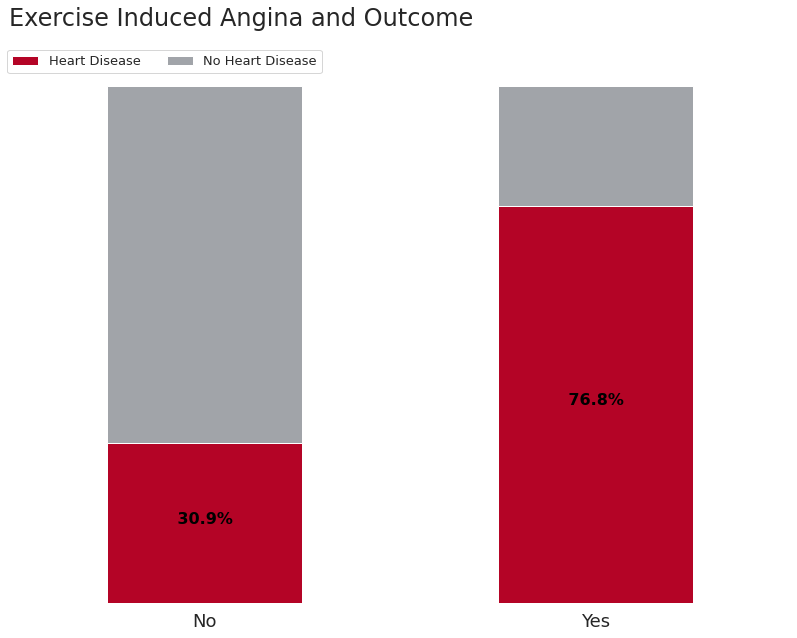

In [ ]:
percentage_plot('Exercise Induced Angina', 'Outcome', [30.9, 76.8], '       ')

###Age, Maximum Heart Rate, and Outcome

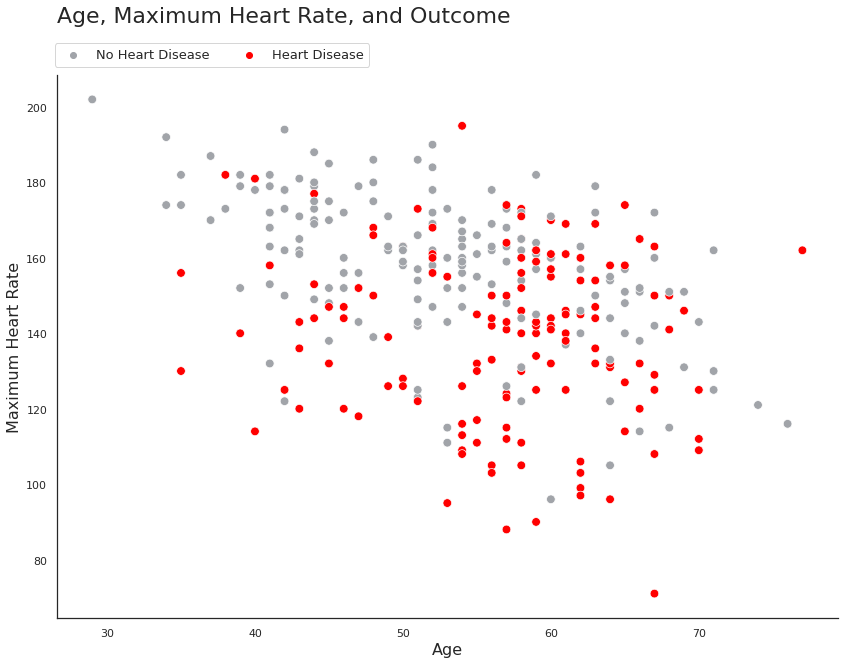

In [ ]:
plot = sns.scatterplot(x = 'Age', y = 'Maximum Heart Rate', data = df, hue = 'Outcome', palette = ['#A1A4A9', 'Red'], s = 75)
plot.set_title('Age, Maximum Heart Rate, and Outcome\n\n', size = 22, loc = 'left', fontname="Arial")
plt.xlabel('Age', size = 16)
plt.ylabel('Maximum Heart Rate', size = 16)
plot.legend(loc='upper left', ncol = 2, bbox_to_anchor=(-0.011, 1.07), prop={'size': 13})
sns.despine()

### Sex, Mean Age, and Heart Disease

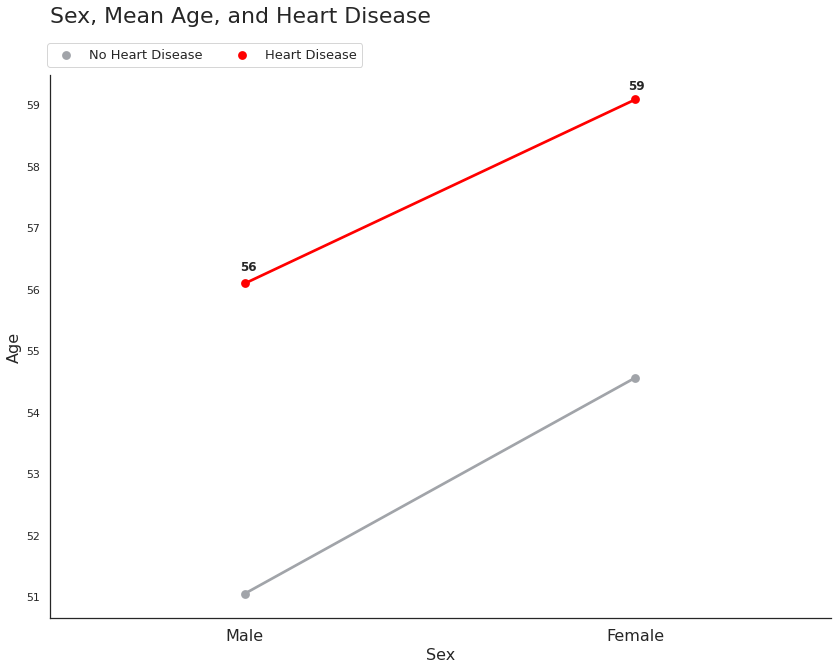

In [ ]:
plot2 = sns.pointplot(x = 'Sex', y = 'Age', data = df, hue = 'Outcome', palette = ['#A1A4A9', 'Red'], ci = None)
plot2.set_title('Sex, Mean Age, and Heart Disease\n\n', size = 22, loc = 'left', fontname="Arial")
plot2.tick_params(axis='x', labelsize=16)
plt.xlabel('Sex', size = 16)
plt.ylabel('Age', size = 16)
plot2.legend(loc='upper left', ncol = 2, bbox_to_anchor=(-0.011, 1.07), prop={'size': 13})
plt.text(-0.012,56.3,"56", weight = 'bold', size = 12)
plt.text(0.98,59.25,"59", weight = 'bold', size = 12)
sns.despine()

### Age, Resting Blood Pressure, and Sex

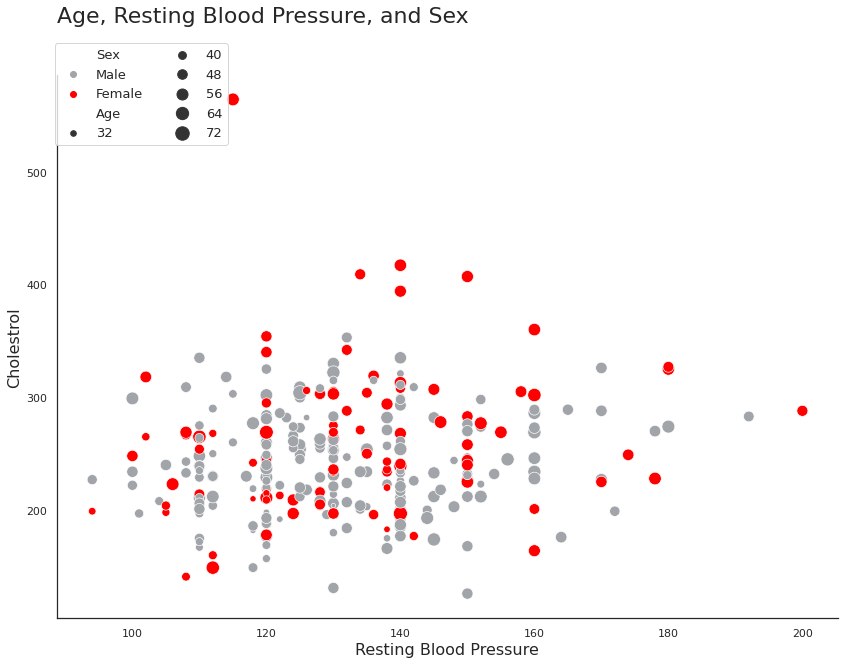

In [ ]:
plot = sns.scatterplot(x = 'Resting Blood Pressure', y = 'Cholestrol', data = df, hue = 'Sex', size = 'Age', sizes = (20,200), palette = ['#A1A4A9', 'Red'], s = 75, x_jitter = True)
plot.set_title('Age, Resting Blood Pressure, and Sex\n\n', size = 22, loc = 'left', fontname="Arial")
plt.xlabel('Resting Blood Pressure', size = 16)
plt.ylabel('Cholestrol', size = 16)
plot.legend(loc='upper left', ncol = 2, bbox_to_anchor=(-0.011, 1.07), prop={'size': 13})
sns.despine()

Resting blood pressure, gender, outcome


Blood pressure is higher in men than in women at similar ages. After menopause, however, blood pressure increases in women to levels even higher than in men.

### Exercise Induced Angina and Chest Pain Type

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


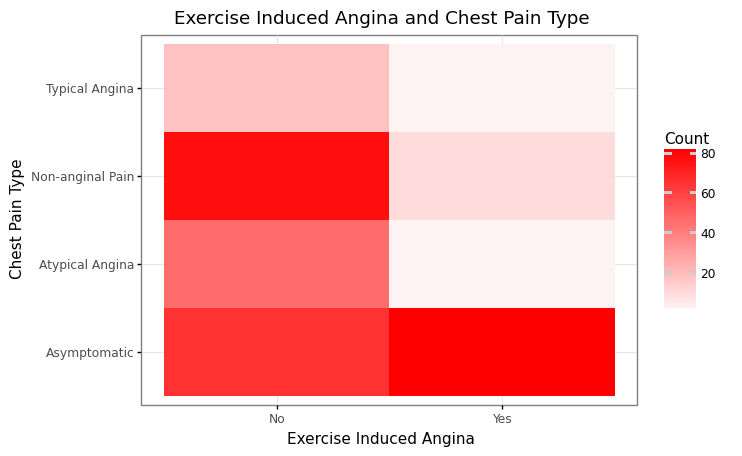

<ggplot: (8753582570829)>


In [ ]:
count_df_1 = df[['Exercise Induced Angina', 'Chest Pain Type', 'Age']].groupby(by=['Exercise Induced Angina','Chest Pain Type'], as_index=False).count()
count_df_1.rename(columns={'Age': 'Count'}, inplace = True)
x = (p9.ggplot(count_df_1, p9.aes(x='Exercise Induced Angina', y='Chest Pain Type')) +
p9.geom_tile(p9.aes(fill='Count')) +
#p9.xlim(scale_count) +
p9.scale_fill_gradient2(low="white", high="red")+p9.theme_bw() + p9.ggtitle("Exercise Induced Angina and Chest Pain Type"))
print(x)

### Exercise Induced Angina and Thalassemia

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


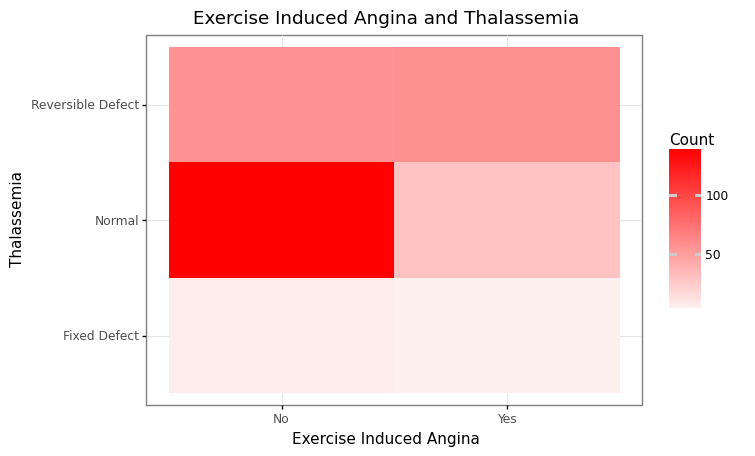

<ggplot: (8753582636753)>


In [ ]:
count_df_1 = df[['Exercise Induced Angina', 'Thalassemia', 'Age']].groupby(by=['Exercise Induced Angina','Thalassemia'], as_index=False).count()
count_df_1.rename(columns={'Age': 'Count'}, inplace = True)
x = (p9.ggplot(count_df_1, p9.aes(x='Exercise Induced Angina', y='Thalassemia')) +
p9.geom_tile(p9.aes(fill='Count')) +
#p9.xlim(scale_count) +
p9.scale_fill_gradient2(low="white", high="red")+p9.theme_bw() + p9.ggtitle("Exercise Induced Angina and Thalassemia"))
print(x)

### Thalassemia and Chest Pain Type

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


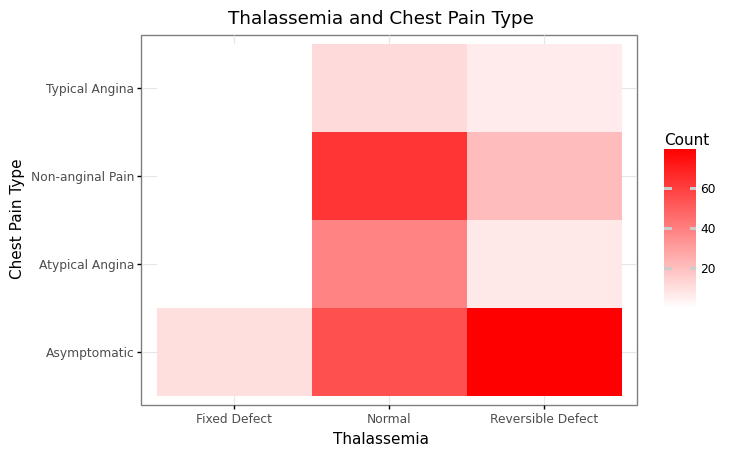

<ggplot: (8753582826885)>


In [ ]:
count_df_2 = df[['Thalassemia', 'Chest Pain Type', 'Age']].groupby(by=['Thalassemia','Chest Pain Type'], as_index=False).count()
count_df_2.rename(columns={'Age': 'Count'}, inplace = True)
x = (p9.ggplot(count_df_2, p9.aes(x='Thalassemia', y='Chest Pain Type')) +
p9.geom_tile(p9.aes(fill='Count')) +
#p9.xlim(scale_count) +
p9.scale_fill_gradient(low="white", high="red")+p9.theme_bw()+p9.ggtitle('Thalassemia and Chest Pain Type'))
print(x)